# Pymaceuticals Inc.
---

### Analysis

1. I am able to analyze through the provided data set that the heavier the bigger the tumor size compared to the smaller weight mice. 
2. Based on the boxplot, I can analyze that Capomulin and Ramicane seem to be more beneficial compared to Infubinol and Ceftamin.
3. Capomulin doesn't appear to be beneficial for the mice that are heavier in weight due to the tumor size being much larger than the mice that don't weigh as much. I analyzed this from the scatter plot. 
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = '/Users/breannamitchell/Downloads/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv'
study_results_path = '/Users/breannamitchell/Downloads/Starter_Code/Pymaceuticals/data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
mice = combined_df['Mouse ID'].unique()
num_mice = len(mice)
num_mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicates = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
remove_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df = remove_duplicates['Mouse ID'].unique()
n_mice_clean_df = len(mice_clean_df)
n_mice_clean_df

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_tumor_volume_mean = remove_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#regimen_tumor_volume_mean
regimen_tumor_volume_median = remove_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#regimen_tumor_volume_median
regimen_tumor_volume_var = remove_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#regimen_tumor_volume_var
regimen_tumor_volume_std = remove_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#regimen_tumor_volume_std
regimen_tumor_volume_sem = remove_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimen_tumor_volume_sem

summary_statistics_table = pd.DataFrame(
        {'Mean Tumor Volume' : regimen_tumor_volume_mean,
        'Median Tumor Volume': regimen_tumor_volume_median, 
        'Tumor Volume Variance': regimen_tumor_volume_var,
        'Tumor Volume Std. Dev': regimen_tumor_volume_std,
        'Tumor Volume Std. Err': regimen_tumor_volume_sem})

summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_method = remove_duplicates.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

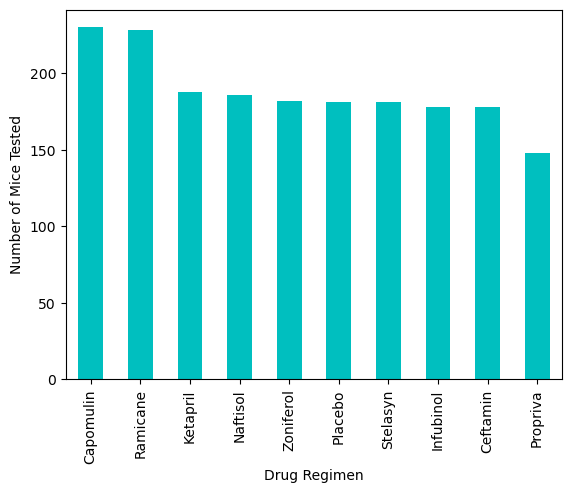

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = remove_duplicates['Drug Regimen'].value_counts()
pandas_plot = total_timepoints.plot.bar(color='c')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

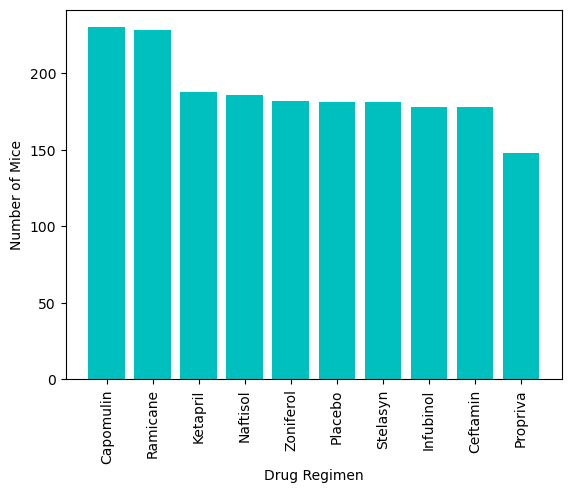

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = total_timepoints.index.values
y_axis = total_timepoints.values

plt.bar(x_axis, y_axis,color='c')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")



<AxesSubplot:ylabel='Sex'>

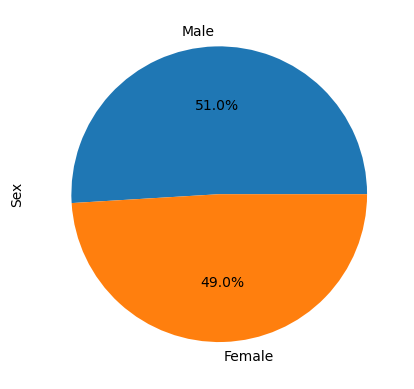

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas = remove_duplicates['Sex'].value_counts()
gender_pandas.plot.pie(autopct= "%1.1f%%")


Text(0, 0.5, 'Sex')

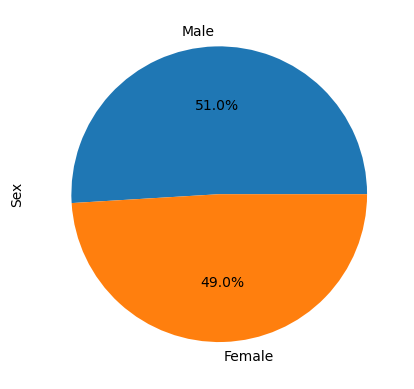

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = gender_pandas.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = remove_duplicates.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_timepoint, remove_duplicates, on=['Mouse ID', 'Timepoint'], how='left')


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]


Text(0, 0.5, 'Final Tumor Volume (mm3)')

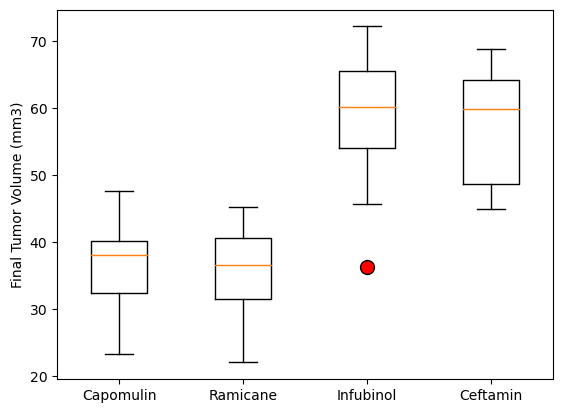

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
red_circle = dict(markerfacecolor='r', marker='o', markersize=10)
ax.boxplot(tumor_volume_data, labels=treatment_list, flierprops= red_circle)
ax.set_ylabel('Final Tumor Volume (mm3)')



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

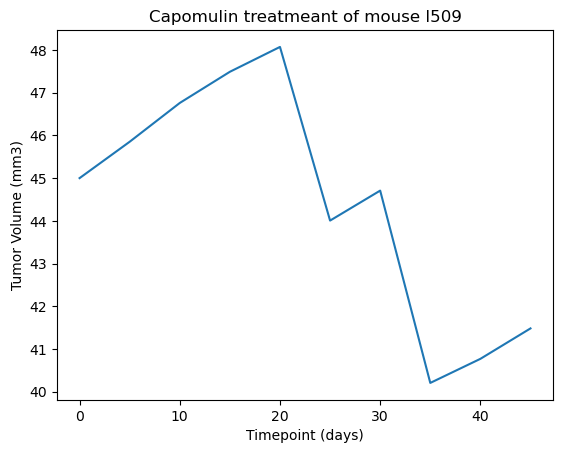

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = remove_duplicates.loc[remove_duplicates["Mouse ID"] == "l509",:]

x_axis_timepoint = line_plot["Timepoint"] 

size_of_tumor = line_plot["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_timepoint, size_of_tumor) 
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')



Text(0, 0.5, 'Average Tumor Volume (mm3)')

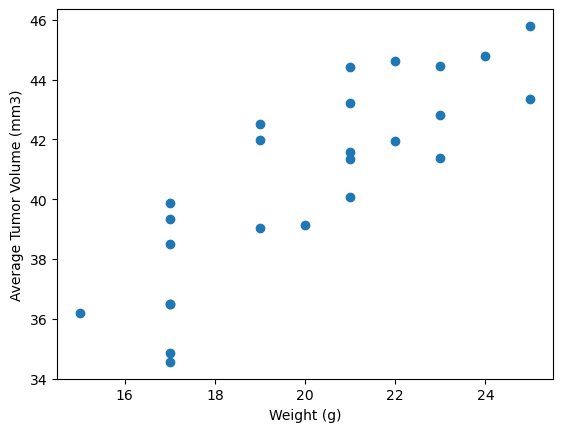

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = remove_duplicates.loc[remove_duplicates["Drug Regimen"] == "Capomulin",:]
avg_capomilin = scatter_plot.groupby(['Mouse ID']).mean()

plt.scatter(avg_capomilin['Weight (g)'],avg_capomilin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

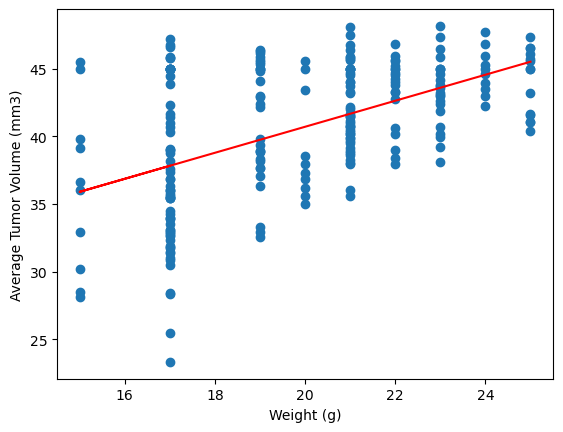

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = remove_duplicates.loc[remove_duplicates["Drug Regimen"] == "Capomulin",:]
correlation_coefficient = round(st.pearsonr(correlation['Weight (g)'], correlation['Tumor Volume (mm3)'])[0],2)

slope, intercept, r_value, p_value, std_err = linregress(correlation['Weight (g)'], correlation['Tumor Volume (mm3)'])
line = slope*correlation['Weight (g)'] + intercept

fig, ax = plt.subplots()
ax.scatter(correlation['Weight (g)'], correlation['Tumor Volume (mm3)'])
ax.plot(correlation['Weight (g)'], line, color='r')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
